In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
import datacube
from astropy.io import fits
import pywcsgrid2
from astropy.wcs import WCS
import mpl_toolkits.axes_grid1.axes_grid as axes_grid
from matplotlib.axes import Axes 
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [17]:
def setup_axes(fig, nx, ny, header):
    
    ax_t = pywcsgrid2.subplot(111, header=header)
    
    #gh = pywcsgrid2.GridHelper(wcs=header)
    #gh.locator_params(nbins=4)

    g = axes_grid.ImageGrid(fig, 111, 
            nrows_ncols=(ny,nx), 
            ngrids=None, direction='row', 
            axes_pad=0.0, 
            add_all=True, 
            share_all=True, 
            aspect=True, 
            label_mode='L', 
            cbar_mode=None) 

    return g, ax_t


In [5]:
hdu12 = fits.open("G1d9_12CO21_trim-100_100.fits")
data12 = hdu12[0].data
header12 = hdu12[0].header

In [7]:
hdu_radio = fits.open("1.51I6.04_AG0184_1985APR16_1_1.07M2.86M.imfits")
data_radio = hdu_radio[0].data
header_radio = hdu_radio[0].header

header_radio["NAXIS"] = 2
header_radio.__delitem__("NAXIS3")
header_radio.__delitem__("CTYPE3")
header_radio.__delitem__("CRVAL3")
header_radio.__delitem__("CDELT3")
header_radio.__delitem__("CRPIX3")
header_radio.__delitem__("CROTA3")
header_radio.__delitem__("NAXIS4")
header_radio.__delitem__("CTYPE4")
header_radio.__delitem__("CRVAL4")
header_radio.__delitem__("CDELT4")
header_radio.__delitem__("CRPIX4")
header_radio.__delitem__("CROTA4")

In [9]:
hdu13 = fits.open("G1d9_13CO21_trim-100_100.fits")
data13 = hdu13[0].data
header13 = hdu13[0].header

In [60]:
dcube12 = datacube.Cube(data12, header12)
dcube13 = datacube.Cube(data13, header13)

In [61]:
regrid_cube12, regrid_header12 = dcube12._regrid_spec()

In [15]:
regrid_dcube12 = datacube.Cube(regrid_cube12, regrid_header12)
reregrid_cube12, reregrid_header12 = regrid_dcube12._regrid_spec()

In [30]:
reregrid_dcube12 = datacube.Cube(reregrid_cube12, reregrid_header12)

In [70]:
(nz,ny,nx) = regrid_cube12.shape
print(nz,ny,nx)

401 10 11


In [55]:
# window set
# unit is m/s
vmin = -50.*1000.
vmax = 50.*1000.

In [42]:
print(kcut1, kcut2)

100 300


Preparing the axes, please wait...
Ready?
Go!
0 ( 0 , 9 )
1 ( 1 , 9 )
2 ( 2 , 9 )
3 ( 3 , 9 )
4 ( 4 , 9 )
5 ( 5 , 9 )
6 ( 6 , 9 )
7 ( 7 , 9 )
8 ( 8 , 9 )
9 ( 9 , 9 )
10 ( 10 , 9 )
11 ( 0 , 8 )
12 ( 1 , 8 )
13 ( 2 , 8 )
14 ( 3 , 8 )
15 ( 4 , 8 )
16 ( 5 , 8 )
17 ( 6 , 8 )
18 ( 7 , 8 )
19 ( 8 , 8 )
20 ( 9 , 8 )
21 ( 10 , 8 )
22 ( 0 , 7 )
23 ( 1 , 7 )
24 ( 2 , 7 )
25 ( 3 , 7 )
26 ( 4 , 7 )
27 ( 5 , 7 )
28 ( 6 , 7 )
29 ( 7 , 7 )
30 ( 8 , 7 )
31 ( 9 , 7 )
32 ( 10 , 7 )
33 ( 0 , 6 )
34 ( 1 , 6 )
35 ( 2 , 6 )
36 ( 3 , 6 )
37 ( 4 , 6 )
38 ( 5 , 6 )
39 ( 6 , 6 )
40 ( 7 , 6 )
41 ( 8 , 6 )
42 ( 9 , 6 )
43 ( 10 , 6 )
44 ( 0 , 5 )
45 ( 1 , 5 )
46 ( 2 , 5 )
47 ( 3 , 5 )
48 ( 4 , 5 )
49 ( 5 , 5 )
50 ( 6 , 5 )
51 ( 7 , 5 )
52 ( 8 , 5 )
53 ( 9 , 5 )
54 ( 10 , 5 )
55 ( 0 , 4 )
56 ( 1 , 4 )
57 ( 2 , 4 )
58 ( 3 , 4 )
59 ( 4 , 4 )
60 ( 5 , 4 )
61 ( 6 , 4 )
62 ( 7 , 4 )
63 ( 8 , 4 )
64 ( 9 , 4 )
65 ( 10 , 4 )
66 ( 0 , 3 )
67 ( 1 , 3 )
68 ( 2 , 3 )
69 ( 3 , 3 )
70 ( 4 , 3 )
71 ( 5 , 3 )
72 ( 6 , 3 )
73 ( 7 , 

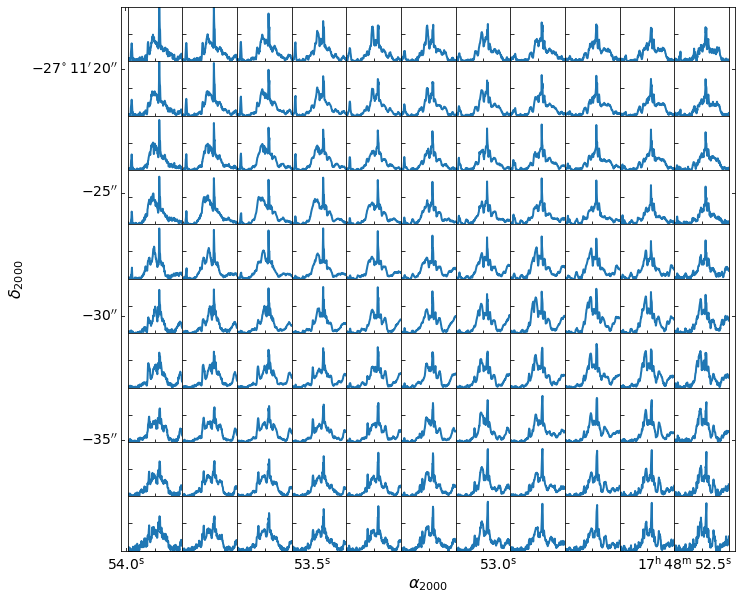

In [65]:
images=[]
fig = figure(1, figsize=(nx,ny))
print("Preparing the axes, please wait...")
g, ax_t = setup_axes(fig, nx, ny, regrid_header12)
print("Ready?")
kcut1, kcut2 = regrid_dcube12._vel2pix(vmin,vmax)
nk = kcut2-kcut1
ml = 0
ii = 0
jj = ny-1
print("Go!")

co_data = regrid_cube12.copy()
co_header = regrid_header12
value_max = np.max(co_data[:,:,:])
for i, ax in enumerate(g):
    #nomalization
    #value_max = np.max(co_data[:,jj,ii])
    co_data[kcut1:kcut2,jj,ii] /= value_max
  
    co_spec = zeros(nk)
    co_spec = co_data[kcut1:kcut2,jj,ii]*(nk-1)#multiply the maximum value
    im = ax.plot(co_spec)
    print(i,'(',ii,',',jj,')')#if it didn't react anymore I feel booring
    ax.set_ylim((ml,ml+nk-1))
    ax.set_xlim((-1,nk-1))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_aspect('equal')
    #ax.set_alpha(0.5)
    #ax.text(nk/2,0,'(%d,%d)'%(ii,jj))

    images.append(im)
    #change ii, jj
    if (ii>=nx-1):
        jj -= 1
        ii = 0
    else:
        ii += 1


In [66]:
cont = ax_t[header_radio].contour(data_radio[0,0,:,:], levels=[0.001,0.009,0.017,0.025], colors="g", linewidths=1)
ax_t.set(xlim=(0,nx-1), ylim=(0,ny-1))
ax_t.grid(False)
ax_t.set_frame_on(False)
#ax_t.set_xlabel("Right Ascension (J2000)")
#ax_t.set_ylabel("Declination (J2000)")
#ax_t.axvline(x=249.8)
#show()
#ax_t.axis[:].toggle(all=False)

fig.savefig("grid_12co_spec.png", transparent=True, bbox_inches="tight")


In [67]:
# add 13CO

regrid_cube13, regrid_header13 = dcube13._regrid_spec()
regrid_dcube13 = datacube.Cube(regrid_cube13, regrid_header13)
(nz,ny,nx) = regrid_cube13.shape

In [68]:
print(nz,ny,nx)

401 10 11


Preparing the axes, please wait...
Ready?
Go!
0 ( 0 , 9 )
1 ( 1 , 9 )
2 ( 2 , 9 )
3 ( 3 , 9 )
4 ( 4 , 9 )
5 ( 5 , 9 )
6 ( 6 , 9 )
7 ( 7 , 9 )
8 ( 8 , 9 )
9 ( 9 , 9 )
10 ( 10 , 9 )
11 ( 0 , 8 )
12 ( 1 , 8 )
13 ( 2 , 8 )
14 ( 3 , 8 )
15 ( 4 , 8 )
16 ( 5 , 8 )
17 ( 6 , 8 )
18 ( 7 , 8 )
19 ( 8 , 8 )
20 ( 9 , 8 )
21 ( 10 , 8 )
22 ( 0 , 7 )
23 ( 1 , 7 )
24 ( 2 , 7 )
25 ( 3 , 7 )
26 ( 4 , 7 )
27 ( 5 , 7 )
28 ( 6 , 7 )
29 ( 7 , 7 )
30 ( 8 , 7 )
31 ( 9 , 7 )
32 ( 10 , 7 )
33 ( 0 , 6 )
34 ( 1 , 6 )
35 ( 2 , 6 )
36 ( 3 , 6 )
37 ( 4 , 6 )
38 ( 5 , 6 )
39 ( 6 , 6 )
40 ( 7 , 6 )
41 ( 8 , 6 )
42 ( 9 , 6 )
43 ( 10 , 6 )
44 ( 0 , 5 )
45 ( 1 , 5 )
46 ( 2 , 5 )
47 ( 3 , 5 )
48 ( 4 , 5 )
49 ( 5 , 5 )
50 ( 6 , 5 )
51 ( 7 , 5 )
52 ( 8 , 5 )
53 ( 9 , 5 )
54 ( 10 , 5 )
55 ( 0 , 4 )
56 ( 1 , 4 )
57 ( 2 , 4 )
58 ( 3 , 4 )
59 ( 4 , 4 )
60 ( 5 , 4 )
61 ( 6 , 4 )
62 ( 7 , 4 )
63 ( 8 , 4 )
64 ( 9 , 4 )
65 ( 10 , 4 )
66 ( 0 , 3 )
67 ( 1 , 3 )
68 ( 2 , 3 )
69 ( 3 , 3 )
70 ( 4 , 3 )
71 ( 5 , 3 )
72 ( 6 , 3 )
73 ( 7 , 

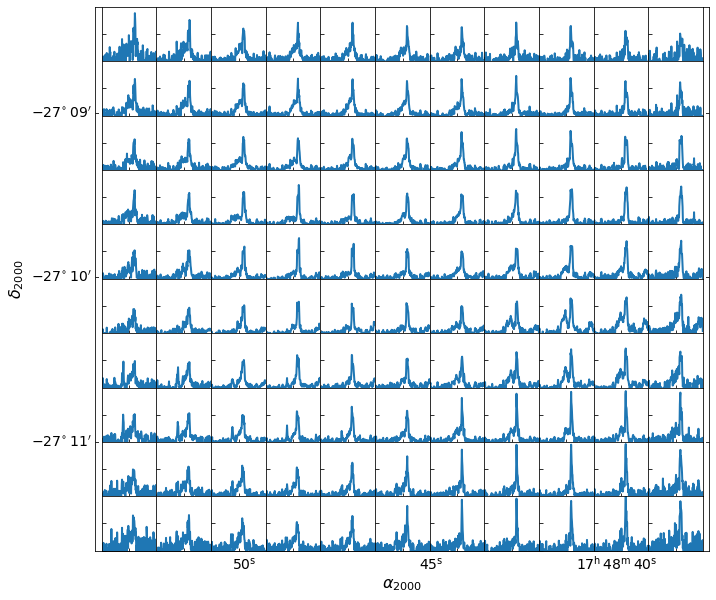

In [69]:
images=[]
fig = figure(1, figsize=(nx,ny))
print("Preparing the axes, please wait...")
g, ax_t = setup_axes(fig, nx, ny, regrid_header13)
print("Ready?")
kcut1, kcut2 = regrid_dcube13._vel2pix(vmin,vmax)
nk = kcut2-kcut1
ml = 0
ii = 0
jj = ny-1
print("Go!")

co_data = regrid_cube13.copy()
co_header = regrid_header13
value_max = np.max(co_data[:,:,:])
for i, ax in enumerate(g):
    #nomalization
    #value_max = np.max(co_data[:,jj,ii])
    co_data[kcut1:kcut2,jj,ii] /= value_max
  
    co_spec = zeros(nk)
    co_spec = co_data[kcut1:kcut2,jj,ii]*(nk-1)#multiply the maximum value
    im = ax.plot(co_spec)
    print(i,'(',ii,',',jj,')')#if it didn't react anymore I feel booring
    ax.set_ylim((ml,ml+nk-1))
    ax.set_xlim((-1,nk-1))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_aspect('equal')
    #ax.set_alpha(0.5)
    #ax.text(nk/2,0,'(%d,%d)'%(ii,jj))

    images.append(im)
    #change ii, jj
    if (ii>=nx-1):
        jj -= 1
        ii = 0
    else:
        ii += 1

cont = ax_t[header_radio].contour(data_radio[0,0,:,:], levels=[0.001,0.009,0.017,0.025], colors="g", linewidths=1)
ax_t.set(xlim=(0,nx-1), ylim=(0,ny-1))
ax_t.grid(False)
ax_t.set_frame_on(False)
#ax_t.set_xlabel("Right Ascension (J2000)")
#ax_t.set_ylabel("Declination (J2000)")
#ax_t.axvline(x=249.8)
#show()
#ax_t.axis[:].toggle(all=False)

fig.savefig("grid_13co_spec.png", transparent=True, bbox_inches="tight")


In [73]:
print(regrid_header12["CRVAL1"], regrid_header13["CRVAL1"])
print(regrid_header12["CRVAL2"], regrid_header13["CRVAL2"])
print(regrid_header12["CDELT1"], regrid_header13["CDELT1"])
print(regrid_header12["CDELT2"], regrid_header13["CDELT2"])
print(regrid_header12["CRPIX1"], regrid_header13["CRPIX1"])
print(regrid_header12["CRPIX2"], regrid_header13["CRPIX2"])

267.1906944445099 267.1906944445099
-27.169861111139948 -27.169861111139948
-0.006111111239788 -0.006111111239788
0.006111111239788 0.006111111239788
6.0 6.0
5.0 5.0


In [78]:
vmin=-35.*1000.
vmax=35.*1000.

In [ ]:
images=[]
fig = figure(1, figsize=(nx,ny))
print("Preparing the axes, please wait...")
g, ax_t = setup_axes(fig, nx, ny, regrid_header13)
print("Ready?")
kcut1, kcut2 = regrid_dcube13._vel2pix(vmin,vmax)
nk = kcut2-kcut1
ml = 0
ii = 0
jj = ny-1
print("Go!")

co_data = regrid_cube13.copy()
co_header = regrid_header13
co_data2 = regrid_cube12.copy()
value_max = np.max(co_data2[:,:,:])
for i, ax in enumerate(g):
    #nomalization
    #value_max = np.max(co_data[:,jj,ii])
    co_data[kcut1:kcut2,jj,ii] /= value_max
    co_data2[kcut1:kcut2,jj,ii] /= value_max
  
    co_spec = zeros(nk)
    co_spec = co_data[kcut1:kcut2,jj,ii]*4.*(nk-1)#multiply the maximum value
    co_spec2 = zeros(nk)
    co_spec2 = co_data2[kcut1:kcut2,jj,ii]*(nk-1)#multiply the maximum value
    im = ax.plot(co_spec)
    im = ax.plot(co_spec2)
    print(i,'(',ii,',',jj,')')#if it didn't react anymore I feel booring
    ax.set_ylim((ml,ml+nk-1))
    ax.set_xlim((-1,nk-1))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_aspect('equal')
    #ax.set_alpha(0.5)
    #ax.text(nk/2,0,'(%d,%d)'%(ii,jj))

    images.append(im)
    #change ii, jj
    if (ii>=nx-1):
        jj -= 1
        ii = 0
    else:
        ii += 1

cont = ax_t[header_radio].contour(data_radio[0,0,:,:], levels=[0.001,0.009,0.017,0.025], colors="g", linewidths=1)
ax_t.set(xlim=(0,nx-1), ylim=(0,ny-1))
ax_t.grid(False)
ax_t.set_frame_on(False)
#ax_t.set_xlabel("Right Ascension (J2000)")
#ax_t.set_ylabel("Declination (J2000)")
#ax_t.axvline(x=249.8)
#show()
#ax_t.axis[:].toggle(all=False)

fig.savefig("grid_1213co_spec2.png", transparent=True, bbox_inches="tight")


Preparing the axes, please wait...
Ready?
Go!
0 ( 0 , 9 )
1 ( 1 , 9 )
2 ( 2 , 9 )
3 ( 3 , 9 )
4 ( 4 , 9 )
5 ( 5 , 9 )
6 ( 6 , 9 )
7 ( 7 , 9 )
8 ( 8 , 9 )
9 ( 9 , 9 )
10 ( 10 , 9 )
11 ( 0 , 8 )
12 ( 1 , 8 )
13 ( 2 , 8 )
14 ( 3 , 8 )
15 ( 4 , 8 )
16 ( 5 , 8 )
17 ( 6 , 8 )
18 ( 7 , 8 )
19 ( 8 , 8 )
20 ( 9 , 8 )
21 ( 10 , 8 )
22 ( 0 , 7 )
23 ( 1 , 7 )
24 ( 2 , 7 )
25 ( 3 , 7 )
26 ( 4 , 7 )
27 ( 5 , 7 )
28 ( 6 , 7 )
29 ( 7 , 7 )
30 ( 8 , 7 )
31 ( 9 , 7 )
32 ( 10 , 7 )
33 ( 0 , 6 )
34 ( 1 , 6 )
35 ( 2 , 6 )
36 ( 3 , 6 )
37 ( 4 , 6 )
38 ( 5 , 6 )
39 ( 6 , 6 )
40 ( 7 , 6 )
41 ( 8 , 6 )
42 ( 9 , 6 )
43 ( 10 , 6 )
44 ( 0 , 5 )
45 ( 1 , 5 )
46 ( 2 , 5 )
47 ( 3 , 5 )
48 ( 4 , 5 )
49 ( 5 , 5 )
50 ( 6 , 5 )
51 ( 7 , 5 )
52 ( 8 , 5 )
53 ( 9 , 5 )
54 ( 10 , 5 )
55 ( 0 , 4 )
56 ( 1 , 4 )
57 ( 2 , 4 )
58 ( 3 , 4 )
59 ( 4 , 4 )
60 ( 5 , 4 )
61 ( 6 , 4 )
62 ( 7 , 4 )
63 ( 8 , 4 )
64 ( 9 , 4 )
65 ( 10 , 4 )
66 ( 0 , 3 )
67 ( 1 , 3 )
68 ( 2 , 3 )
69 ( 3 , 3 )
70 ( 4 , 3 )
71 ( 5 , 3 )
72 ( 6 , 3 )
73 ( 7 , 